In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, matthews_corrcoef, roc_curve, auc , make_scorer
from sklearn.utils import shuffle
from sklearn.cross_validation import KFold

from sklearn.metrics import roc_auc_score

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def DATA(filename):
    #filename = 'classifier-train-data.csv'
    data = pd.read_csv(filename)

    #specify featuure and target
    Feature = data.drop(['class_id', 'Unnamed: 0'], axis=1)
    Target  = data['class_id']
   
    # shuffle the dataset
    X, y = shuffle(Feature, Target, random_state=0)

    #standardize data
    X = (X - X.mean()) / X.std()

    # Split the dataset in two equal parts
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=0)

    return X_train, X_test, y_train, y_test, X, y


def run_SVM (X_train, X_test, y_train, y_test, kernel= 'linear'):
    #Train algorithm
    svclassifier = SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel= kernel,
      max_iter=-1, probability=True, random_state=None, shrinking=True,
      tol=0.001, verbose=False)
    
    svclassifier.fit(X_train, y_train)
    #make prediction
    y_pred = svclassifier.predict(X_test)
    
    # results
    print("Confusion Marix:  ")
    print(confusion_matrix(y_test,y_pred))  
    print("Classification Report: ")
    print(classification_report(y_test,y_pred))
    print("Accuracy:  %f " % (accuracy_score(y_test, y_pred)))
    print("Matthew's corrcoef:  %f " % matthews_corrcoef(y_test, y_pred))
    
    #AUROC results
    prob_y = svclassifier.predict_proba(X_test)
    prob_yy  = [p[1] for p in prob_y]
    print("AUROC:  %f" % roc_auc_score(y_test, prob_yy) )
    
    return svclassifier, prob_y , y_pred
    
    # Validate with k-fold
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test =X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [12]:
filename = './feature-tables/train-data_1526424532.csv'
X_train, X_test, y_train, y_test, X, y = DATA(filename)
Region_per_img = y.size/410
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'linear')

Confusion Marix:  
[[2818  319]
 [   6   45]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.90      0.95      3137
        1.0       0.12      0.88      0.22        51

avg / total       0.98      0.90      0.93      3188

Accuracy:  0.898055 
Matthew's corrcoef:  0.307980 
AUROC:  0.910380


In [107]:
y_test.shape

(3188,)

In [9]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'rbf')

Confusion Marix:  
[[2873  264]
 [  13   38]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       1.00      0.92      0.95      3137
        1.0       0.13      0.75      0.22        51

avg / total       0.98      0.91      0.94      3188

Accuracy:  0.913112 
Matthew's corrcoef:  0.283174 
AUROC:  0.868021


In [10]:
scv , prob_y, y_pred = run_SVM (X_train, X_test, y_train, y_test, 'sigmoid')

Confusion Marix:  
[[1921 1216]
 [  14   37]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.61      0.76      3137
        1.0       0.03      0.73      0.06        51

avg / total       0.98      0.61      0.75      3188

Accuracy:  0.614178 
Matthew's corrcoef:  0.086788 
AUROC:  0.741529


In [11]:
scv , prob_y, y_pred =run_SVM (X_train, X_test, y_train, y_test,'poly')

Confusion Marix:  
[[2958  179]
 [  18   33]]
Classification Report: 
             precision    recall  f1-score   support

       -1.0       0.99      0.94      0.97      3137
        1.0       0.16      0.65      0.25        51

avg / total       0.98      0.94      0.96      3188

Accuracy:  0.938206 
Matthew's corrcoef:  0.297104 
AUROC:  0.869027


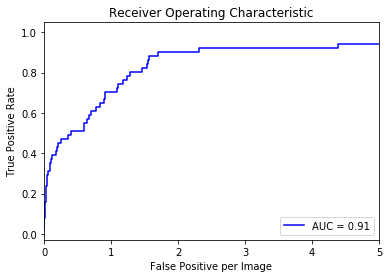

In [118]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob_y[:,1], pos_label=1, drop_intermediate=True)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
#plt.plot(false_positive_rate, true_positive_rate, 'b',
#label='AUC = %0.2f'% roc_auc)
#reg_per_img = (y_pred.size - 51) / 3188
#print (reg_per_img)

fp = false_positive_rate * Region_per_img
plt.plot(fp, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.xlim([-0,5])
#plt.ylim([-0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive per Image')
plt.show()

In [53]:
y_pred.shape

(3188,)

In [77]:
#run_kfold(svc)

In [4]:
parameters = [{'kernel': ['poly'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
                'C': [1, 10, 100, 1000]},
             {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

def Mattew_score(actual,prediction):
    return matthews_corrcoef(actual, prediction)

grid_scorer = make_scorer(Mattew_score, greater_is_better=True)
#parameters = {'n_estimators': [10,20,30], 'max_features': ['auto','sqrt','log2',0.5,0.3], }

clf = GridSearchCV(svm.SVC(decision_function_shape='ovr', class_weight='balanced', probability=True), parameters, cv=25,scoring = grid_scorer)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in true_divide
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\mahle\Anaconda3\lib\site-packages\sklearn\metrics\classi

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on training set:

0.000 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
-0.000 (+/-0.004) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.135 (+/-0.392) for {'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
0.255 (+/-0.269) for {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.229 (+/-0.267) for {'C': 1, 'gamma': 0.2, 'kernel': 'poly'}
0.202 (+/-0.273) for {'C': 1, 'gamma': 0.5, 'kernel': 'poly'}
0.000 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
-0.000 (+/-0.004) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.203 (+/-0.379) for {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}
0.220 (+/-0.268) for {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
0.204 (+/-0.274) for {'C': 10, 'gamma': 0.2, 'kernel': 'poly'}
0.177 (+/-0.265) for {'C': 10, 'gamma': 0.5, 'kernel': 'poly'}
0.000 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.062 (+/-0.336) for {'C': 100, 'gamma': 0.001, 'kernel': 'pol

In [5]:
clf.best_estimator_ 

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
print("Best Score:  %f " % (clf.best_score_ ))
print("Best Params:  %r" % (clf.best_params_ ))
print("Best Index:  %f" % (clf.best_index_ ))
print("Best Estimator:  %r" % (clf.best_estimator_ ))


Best Score:  0.293409 
Best Params:  {'C': 1, 'kernel': 'linear'}
Best Index:  24.000000
Best Estimator:  SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
